<a href="https://colab.research.google.com/github/muskanvarmaa/Internboot/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
holidays = pd.read_csv('/content/holidays_events.csv')
oil = pd.read_csv('/content/oil.csv')
sample_sub = pd.read_csv('/content/sample_submission.csv')
stores = pd.read_csv('/content/stores.csv')
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')
transactions = pd.read_csv('/content/transactions.csv')

print("Holidays shape:", holidays.shape)
print("Oil shape:", oil.shape)
print("Sample submission shape:", sample_sub.shape)
print("Stores shape:", stores.shape)
print("Test shape:", test.shape)
print("Train shape:", train.shape)
print("Transactions shape:", transactions.shape)


Holidays shape: (350, 6)
Oil shape: (1218, 2)
Sample submission shape: (28512, 2)
Stores shape: (54, 5)
Test shape: (28512, 5)
Train shape: (1802063, 6)
Transactions shape: (83488, 3)


In [ ]:
train['date'] = pd.to_datetime(train['date'])
print("\nMissing values before cleaning:")
print(train.isnull().sum())
train = train.drop_duplicates()
train = train.fillna(0)
print("\nMissing values after cleaning:")
print(train.isnull().sum())



Missing values before cleaning:
id             0
date           0
store_nbr      0
family         0
sales          1
onpromotion    1
dtype: int64

Missing values after cleaning:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


In [ ]:
print("\nDescriptive Statistics:")
print(train.describe())
print("\nMean of sales:", train['sales'].mean())
print("Median of sales:", train['sales'].median())
print("Mode of sales:", train['sales'].mode()[0])



Descriptive Statistics:
                 id                           date     store_nbr  \
count  1.802063e+06                        1802063  1.802063e+06   
mean   9.010310e+05  2014-05-22 01:28:30.825204224  2.749641e+01   
min    0.000000e+00            2013-01-01 00:00:00  1.000000e+00   
25%    4.505155e+05            2013-09-10 00:00:00  1.400000e+01   
50%    9.010310e+05            2014-05-22 00:00:00  2.700000e+01   
75%    1.351546e+06            2015-01-31 00:00:00  4.100000e+01   
max    1.802062e+06            2015-10-11 00:00:00  5.400000e+01   
std    5.202109e+05                            NaN  1.558569e+01   

              sales   onpromotion  
count  1.802063e+06  1.802063e+06  
mean   2.916849e+02  6.728616e-01  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    4.000000e+00  0.000000e+00  
75%    1.540000e+02  0.000000e+00  
max    4.627100e+04  2.180000e+02  
std    9.281107e+02  5.875109e+00  

Mean of sales: 291.68493970962396
Med

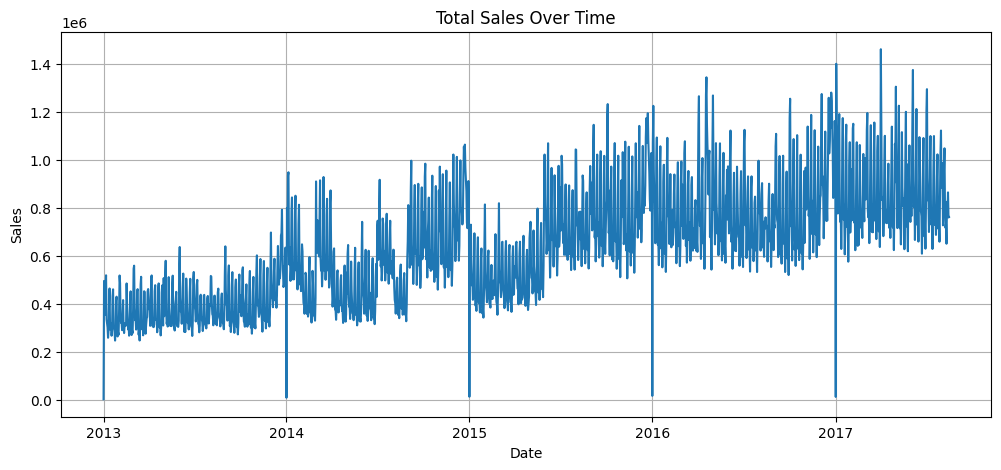

In [ ]:
daily_sales = train.groupby('date')['sales'].sum()
plt.figure(figsize=(12,5))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


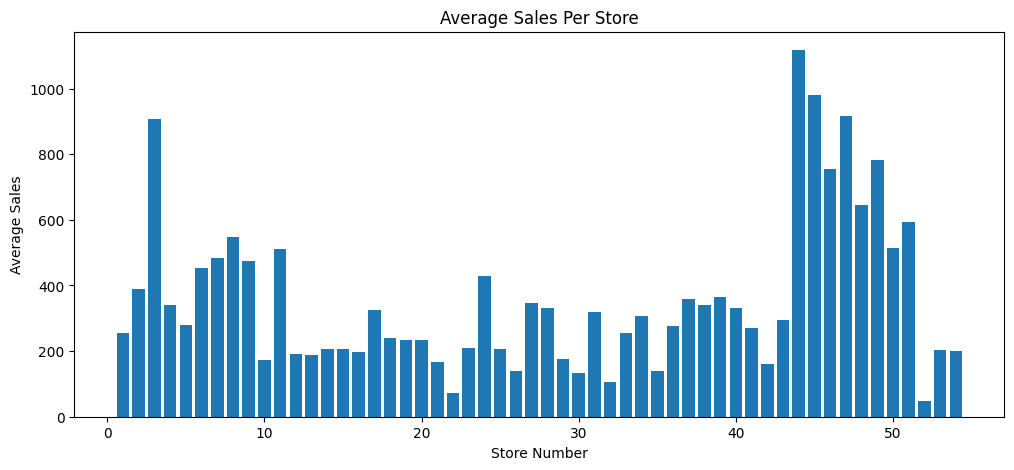

In [ ]:
store_sales = train.groupby('store_nbr')['sales'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,5))
plt.bar(store_sales.index, store_sales.values)
plt.title('Average Sales Per Store')
plt.xlabel('Store Number')
plt.ylabel('Average Sales')
plt.show()


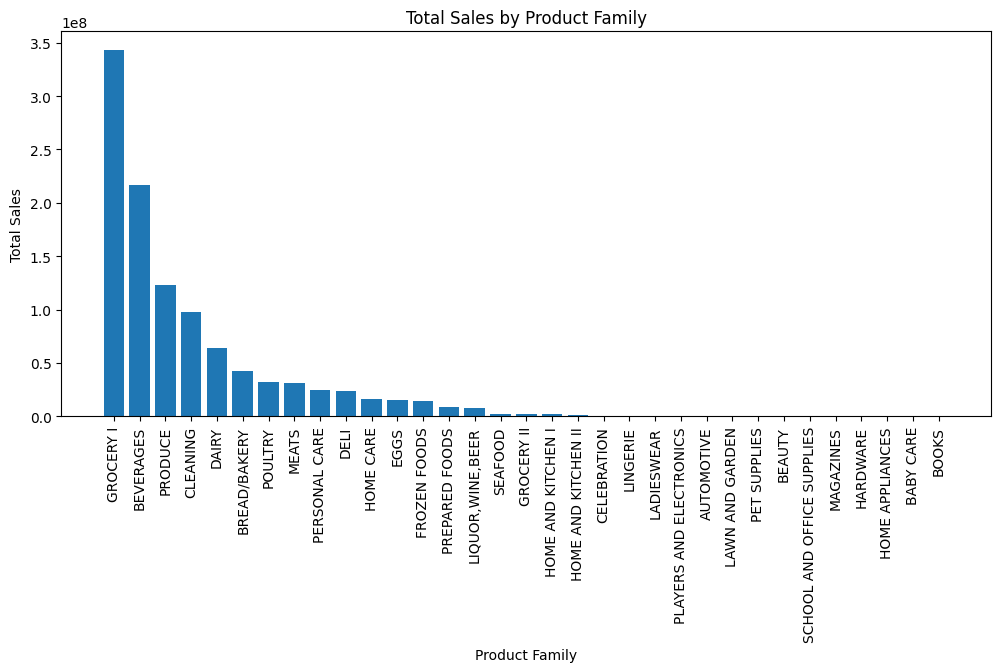

In [ ]:
family_sales = train.groupby('family')['sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,5))
plt.bar(family_sales.index, family_sales.values)
plt.title('Total Sales by Product Family')
plt.xlabel('Product Family')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


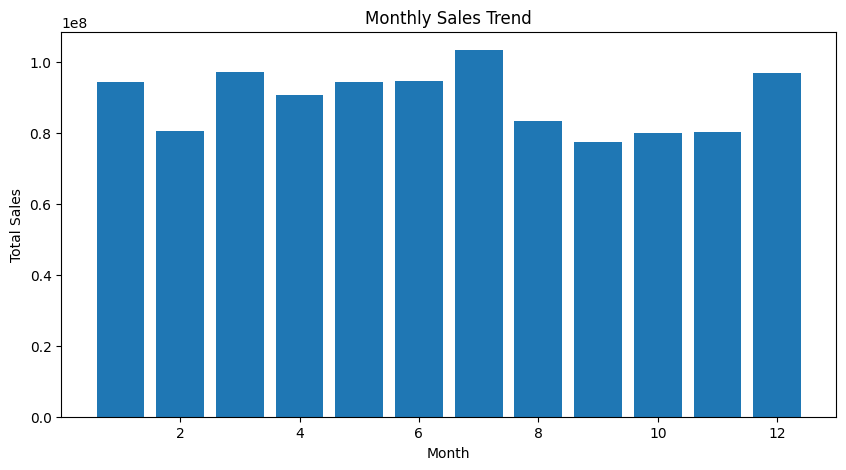

In [ ]:
train['month'] = train['date'].dt.month
month_sales = train.groupby('month')['sales'].sum()
plt.figure(figsize=(10,5))
plt.bar(month_sales.index, month_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


In [ ]:
train.to_csv('/content/train_cleaned.csv', index=False)
print("✅ Cleaned train data saved.")


✅ Cleaned train data saved.
